In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv(r'C:\Users\Mayur\Downloads\Modified.csv')
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,Temp,Duration,RPM
0,2013-07-29,MJ1321YNG0DMHA,Hitachi HDS5C3030ALA630,3000592982016,NOT FAIL,12688.97,3306.02,17244,21,90.32,24.183211,81,7109
1,2013-12-05,JK11A8B9J97SWF,Hitachi HDS722020ALA330,2000398934016,NOT FAIL,24791.93,3084.01,24839,30,99.51,20.146430,115,5286
2,2013-10-26,MJ0351YNG9Z6GA,Hitachi HDS5C3030ALA630,3000592982016,NOT FAIL,25327.22,2665.91,8364,26,111.38,20.521995,138,9631
3,2013-04-24,JK1101B9KP2ENF,Hitachi HDS722020ALA330,2000398934016,NOT FAIL,24893.94,2698.33,17562,26,116.91,22.560980,102,4488
4,2013-07-16,MJ1321YNG09T2A,Hitachi HDS5C3030ALA630,3000592982016,NOT FAIL,18711.09,2815.64,16956,23,118.83,33.413798,88,11193


In [69]:
df_norm = df[['smart_1_raw','smart_2_raw','smart_3_raw', 'smart_4_raw', 'smart_5_raw','Temp','Duration','RPM']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)


,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,Temp,Duration,RPM
13708,0.262997,0.669343,0.414686,0.333333,0.619982,0.367706,1.000000,0.691294
10932,0.619078,0.672915,0.340768,0.200000,0.555330,0.545850,0.825000,0.205647
12827,0.605267,0.488475,0.091595,0.266667,0.597628,0.707622,0.808333,0.719529
10187,0.469048,0.464495,0.647235,0.366667,0.540301,0.498119,0.700000,0.910941
635,0.551835,0.565559,0.263815,0.400000,0.281660,0.464320,0.900000,0.154941


In [70]:
target = df[['failure']].replace(['NOT FAIL','FAIL'],[0,1])
target.sample(n=5)

,failure
2836,0
5521,0
6982,0
10126,0
2861,0


In [71]:
df1 = pd.concat([df_norm, target], axis=1)
df1.sample(n=5)

,smart_1_raw,smart_2_raw,smart_3_raw,smart_4_raw,smart_5_raw,Temp,Duration,RPM,failure
12545,0.497849,0.665743,0.682100,0.300000,0.590050,0.449436,0.683333,0.156000,0
825,0.511560,0.640391,0.279681,0.433333,0.297578,0.593014,0.391667,0.848471,0
1248,0.497936,0.573429,0.605000,0.366667,0.323356,0.497269,0.250000,0.694588,0
12764,0.415566,0.426409,0.036848,0.300000,0.595979,0.463563,0.858333,0.028588,0
4297,0.479715,0.591693,0.081018,0.300000,0.424187,0.763633,0.050000,0.782235,0


In [72]:
X = df1.drop(['failure'], axis=1).values
y = df1['failure'].values

In [73]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=123)

In [7]:
#X = df.drop(['date','serial_number','model','failure'], axis=1)
#y = df['failure']
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
#dtrain = xgb.DMatrix(x_train, label=y_train)
#dtest = xgb.DMatrix(x_test, label=y_test)

In [75]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, mean_absolute_error,accuracy_score, classification_report


In [76]:
eval_set = [(x_test,y_test)]
clf = XGBClassifier(objective ='reg:linear', 
                             max_depth = 3,
                             silent = 1,
                             learning_rate = 0.3,
                             n_estimators = 200)

clf.fit(x_train, y_train, early_stopping_rounds=10,eval_metric= 'logloss', eval_set=eval_set)

y_pred = clf.predict(x_test)
print("Classification Report: \n", classification_report(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy",accuracy)

[0]	validation_0-logloss:0.468403
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.342614
[2]	validation_0-logloss:0.267071
[3]	validation_0-logloss:0.220441
[4]	validation_0-logloss:0.190962
[5]	validation_0-logloss:0.172669
[6]	validation_0-logloss:0.160548
[7]	validation_0-logloss:0.153403
[8]	validation_0-logloss:0.149301
[9]	validation_0-logloss:0.146202
[10]	validation_0-logloss:0.143284
[11]	validation_0-logloss:0.142232
[12]	validation_0-logloss:0.141784
[13]	validation_0-logloss:0.141389
[14]	validation_0-logloss:0.141618
[15]	validation_0-logloss:0.142979
[16]	validation_0-logloss:0.143045
[17]	validation_0-logloss:0.143351
[18]	validation_0-logloss:0.143843
[19]	validation_0-logloss:0.145342
[20]	validation_0-logloss:0.147752
[21]	validation_0-logloss:0.145567
[22]	validation_0-logloss:0.148752
[23]	validation_0-logloss:0.148871
Stopping. Best iteration:
[13]	validation_0-logloss:0.141389

Classification Report: 
              pr

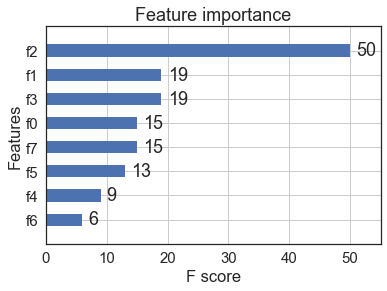

In [66]:
import seaborn as sns
sns.set(font_scale = 1.5)
sns.set_style('white')

#fig, ax = plt.subplots(figsize=(12,18))
#plot_importance(xgb_model, height=0.8)
#plt.show()

plot_importance(clf,height=0.5)
plt.show()